### Transmisor


In [3]:
import numpy as np
from scipy import stats
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt

Lectura de datos y separacion de los mismos.

In [4]:
data = pd.read_excel('Dataset.xlsx')
pulsaciones=data['BPM']



In [6]:
#Prueba de hipótesis aceptada, distribución normal

Pruebas de Anderson-Darling

Prueba de hipotesis aceptada, distribucion normal
P_value=                13.82617384324461
Desviacion Estandar=    19.649260779008685
Media=                  129.15458577437957


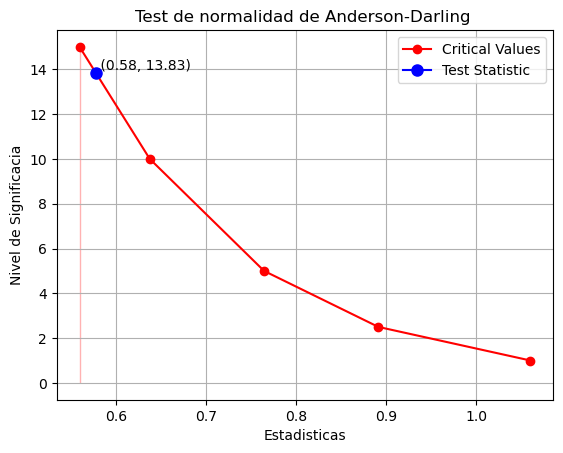

In [5]:
anderson=stats.anderson(pulsaciones)
if anderson.statistic > anderson.critical_values[2]:
    print("prueba de hipotesis rechazada, distribucion no normal")
else:
    print("Prueba de hipotesis aceptada, distribucion normal")
p_value = np.interp(anderson.statistic, anderson.critical_values, anderson.significance_level)
desv_estandar=np.std(pulsaciones)
media=np.mean(pulsaciones)
print("P_value=               ",p_value)
print("Desviacion Estandar=   ",desv_estandar)
print("Media=                 ",media)
plt.plot(anderson.critical_values, anderson.significance_level, marker='o', linestyle='-', color='r', label='Critical Values')
plt.plot(anderson.statistic, p_value, marker='o', markersize=8, color='b', label='Test Statistic')
plt.fill_between(anderson.critical_values, anderson.significance_level, where=anderson.statistic > anderson.critical_values, color='red', alpha=0.3)
plt.text(anderson.statistic, p_value, f' ({anderson.statistic:.2f}, {p_value:.2f})', fontsize=10, ha='left', va='bottom')
plt.xlabel('Estadisticas')
plt.ylabel('Nivel de Significacia')
plt.title('Test de normalidad de Anderson-Darling ')
plt.legend()
plt.grid(True)
plt.show()

Ya que la media, la desviación estándar y el valor p están dentro de los aceptados, la media concuerda con los valores vistos desde la gráfica, además su desviación estándar presenta una distribución normal, respaldada por la prueba de Anderson, se determina que los valores son correctos para ser usados, ya que el valor p es mayor que el nivel de significancia. El valor p de la prueba es 0.58, que es mayor que el nivel de significancia del 5%. Esto significa que no hay evidencia suficiente para rechazar la hipótesis nula de que los datos son normales además el gráfico no muestra ninguna tendencia significativa en los valores del estadístico de prueba. Esto indica que los datos no se desvían significativamente de la normalidad en ningún punto específico.


Creación del histograma



(array([0.00952336, 0.00952336, 0.01269781, 0.00317445, 0.01587226,
        0.00317445, 0.01587226, 0.01269781, 0.01587226, 0.00952336,
        0.00952336, 0.0063489 , 0.01904671, 0.01904671, 0.02222117,
        0.03174452, 0.02222117, 0.01904671, 0.0063489 , 0.01587226,
        0.00952336, 0.01904671, 0.00952336, 0.00952336, 0.00952336,
        0.01587226, 0.01587226, 0.01269781, 0.0063489 , 0.01587226]),
 array([ 90.43588132,  92.91631427,  95.39674721,  97.87718016,
        100.3576131 , 102.83804605, 105.31847899, 107.79891193,
        110.27934488, 112.75977782, 115.24021077, 117.72064371,
        120.20107666, 122.6815096 , 125.16194255, 127.64237549,
        130.12280844, 132.60324138, 135.08367433, 137.56410727,
        140.04454021, 142.52497316, 145.0054061 , 147.48583905,
        149.96627199, 152.44670494, 154.92713788, 157.40757083,
        159.88800377, 162.36843672, 164.84886966]),
 <BarContainer object of 30 artists>)

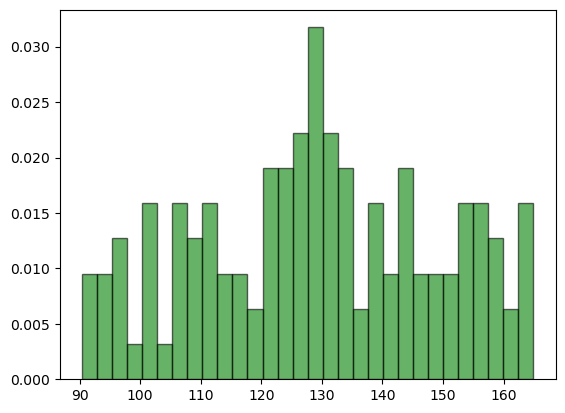

In [8]:
plt.figure()
plt.hist(pulsaciones, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')




Dado que los datos presentan una distribución normal al analizar el histograma se espera una tendencia a una curva gaussiana lo cual se ve reflejado en la figura, pero al presentar una varianza alta se presenta una cola a la derecha la cual indica la presencia significa mente mayor de valores por encima de la mediana.
Diagrama de caja y test de Grubbs:




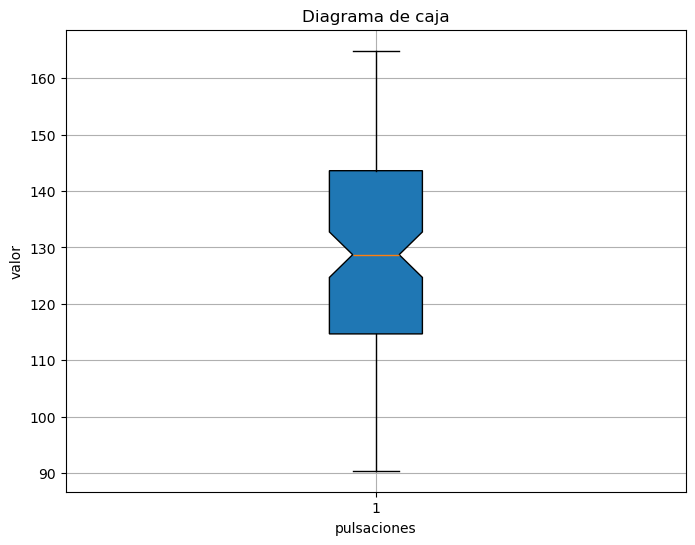

Estadistica de Grubbs=             1.9704916580841614
Valor Critico =                    3.463693519739313
Outlier=                           False


In [63]:
plt.figure(figsize=(8, 6))
plt.boxplot(pulsaciones, patch_artist=True, notch=True)
n=len(pulsaciones)
# Adding labels and title
plt.xlabel('pulsaciones')
plt.ylabel('valor')
plt.title('Diagrama de caja')

plt.grid(True)
plt.show()
dife_absoluta = np.abs(pulsaciones - media)
g_calculado=np.max(dife_absoluta) / desv_estandar
valor_critico = (n - 1) / np.sqrt(n) * np.sqrt(t.ppf((1 - 0.05 / (2 * n)), n - 2) ** 2 / (n - 2 + t.ppf((1 - 0.05 / (2 * n)), n - 2) ** 2))
outlier=g_calculado>valor_critico
print("Estadistica de Grubbs=            ",g_calculado)
print("Valor Critico =                   ",valor_critico)
print("Outlier=                          ",outlier)

Visto desde el diagrama de caja no se encuentran outlier ya que los valores son normales, la desviación estándar no es demasiado grande por lo cual la probabilidad de un outlier es muy baja, como lo demuestra el diagrama de caja hecho con el conjunto de datos obtenido, la línea roja indica que el valor de la media es mayor a la media lo cual indica que la mayoría de valores están por encima de las 129 ppm, los bigotes presentan un IQR de 20 y la no presencia de datos dentro de esa franja indica que los datos presentan una desviación estándar baja.
